Question 1:

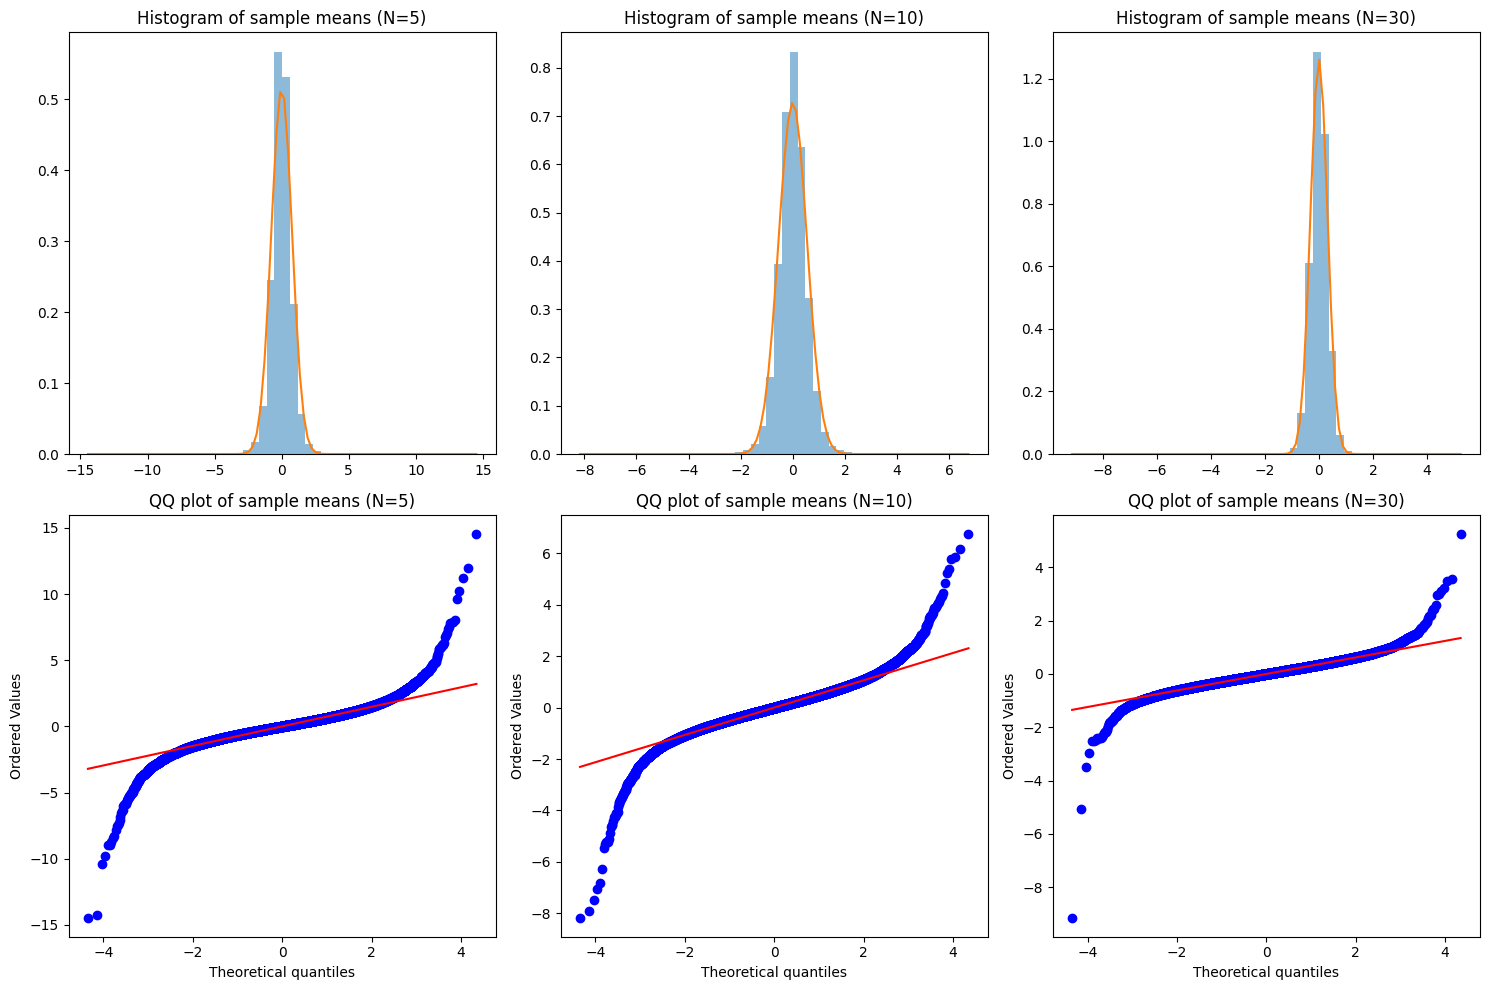

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def generate_plots(N, k, size, axes):
    # Sample from the t-distribution
    np.random.seed(1)  # Set a random seed for reproducibility
    samples = np.random.standard_t(df=k, size=(size, N))

    # Compute sample averages
    sample_means = samples.mean(axis=1)

    # Histogram of sample means
    axes[0].hist(sample_means, bins=50, density=True, alpha=0.5)
    axes[0].set_title(f'Histogram of sample means (N={N})')

    # Plot approximate density given by CLT
    mean, variance = 0, (k / (k - 2)) / N  # Mean and variance for t-distribution
    x = np.linspace(min(sample_means), max(sample_means), 100)
    axes[0].plot(x, stats.norm.pdf(x, mean, np.sqrt(variance)))

    # QQ plot
    stats.probplot(sample_means, dist="norm", plot=axes[1])
    axes[1].set_title(f'QQ plot of sample means (N={N})')

# Parameters
k = 3
N_values = [5, 10, 30]
size = 100000

# Create 2x3 array of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, N in enumerate(N_values):
    generate_plots(N, k, size, axes[:, i])

plt.tight_layout()
plt.show()


Upon comparing the QQ plots above, it is evident that for N = 30, the quantiles align more closely aligned with the diagonal line, indicative of conformity to the Central Limit Theorem (CLT). Notably, the tails exhibit a lighter distribution for N = 30, contrasting with the heavier tails observed for N = 5 and N = 10.

Based on these observations, selecting N = 30 appears to be an optimal choice. This choice highlights that the distribution of sample means, as predicted by the CLT, closely resembles the actual distribution from which the samples were drawn. The improved alignment with the CLT and the lighter tails reinforce the appropriateness of N = 30 for achieving a reliable approximation to the normal distribution.

Question 2:

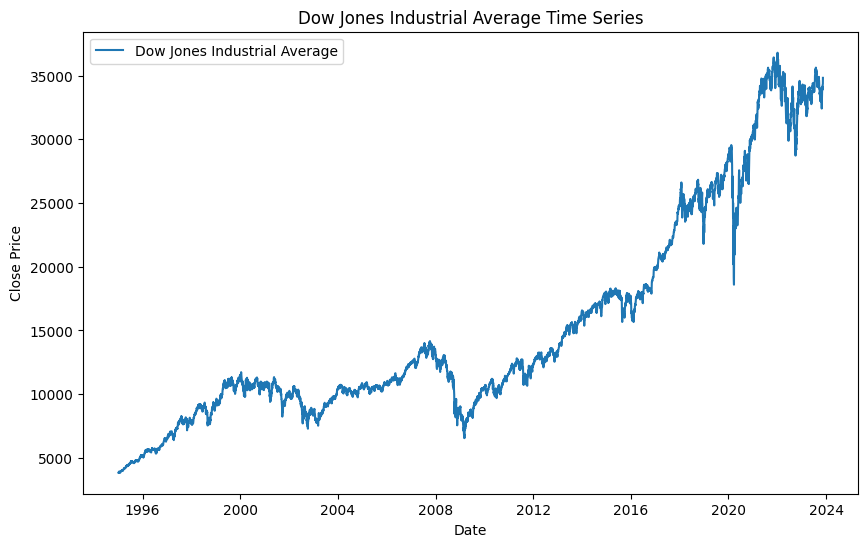

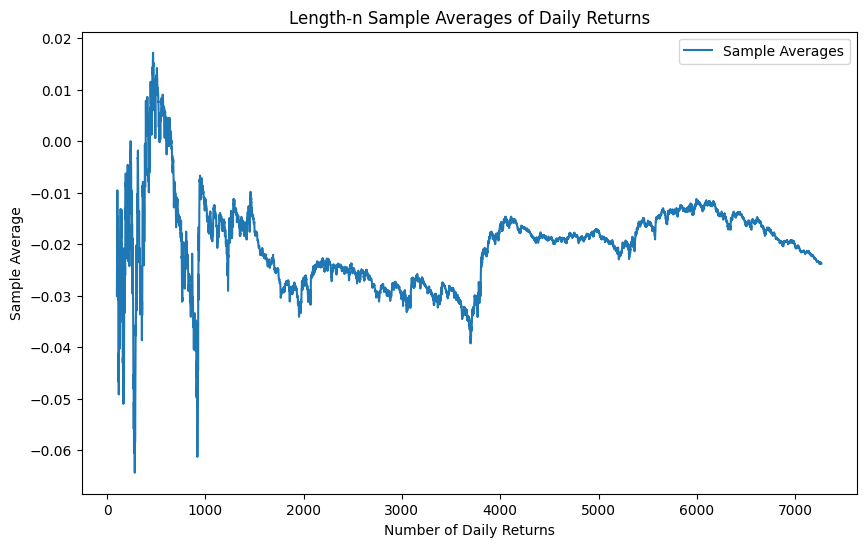

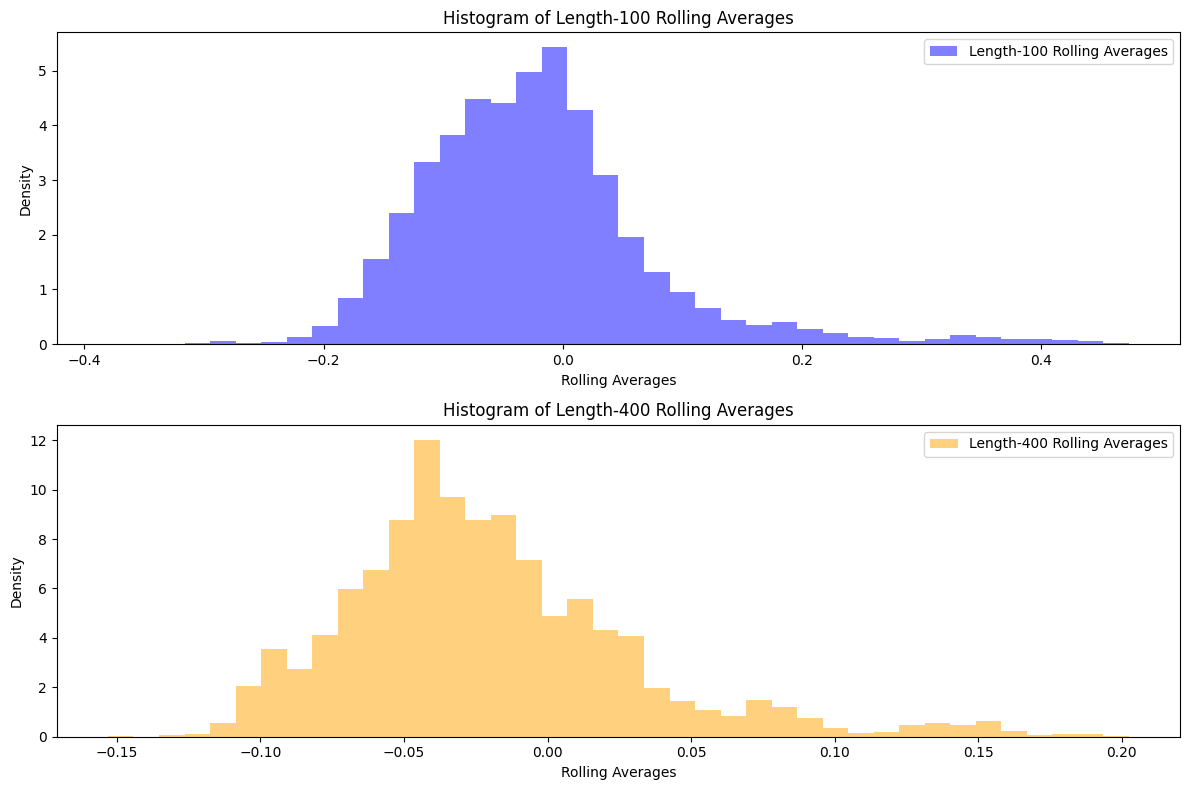

Sample Mean of Daily Returns: -0.023722955410124806
Sample Variance of Daily Returns: 1.3280669272904766
Sample Skewness of Daily Returns: 0.6480631209171596
Sample Kurtosis of Daily Returns: 12.97781454831144


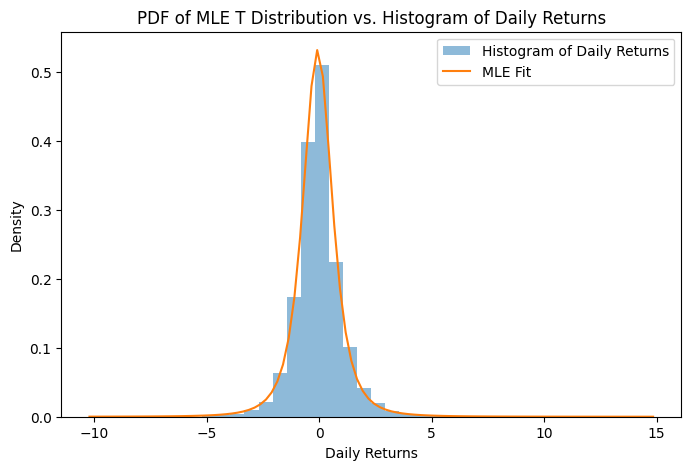

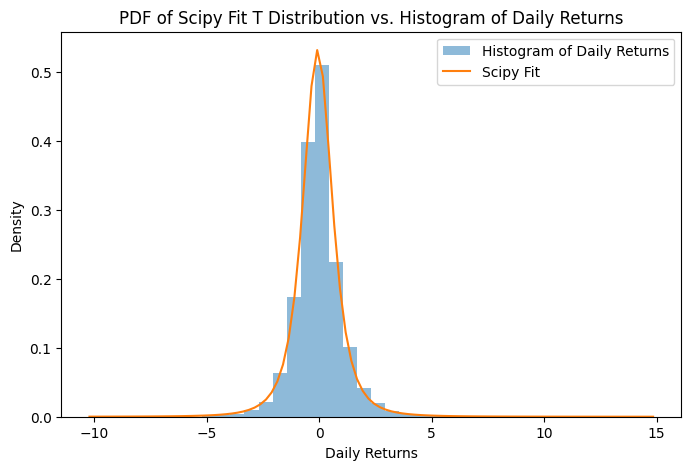

In [ ]:

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as stats
from scipy.stats import norm

# Download Dow Jones Industrial Average from Stooq
data = web.DataReader('^DJI', 'stooq', start='1995-01-01', end='2023-11-14')
data = data.reset_index()
dates, dow = data["Date"], data["Close"].to_numpy()

# (a) Plot the Time Series
plt.figure(figsize=(10, 6))
plt.plot(dates, dow, label='Dow Jones Industrial Average')
plt.title('Dow Jones Industrial Average Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# (b) Compute Daily Returns
returns = 100 * (dow[1:] / dow[:-1] - 1)

# (c) Compute Sample Averages of Daily Returns
n_values = np.arange(100, len(returns) + 1)
sample_averages = [np.mean(returns[:n]) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, sample_averages, label='Sample Averages')
plt.title('Length-n Sample Averages of Daily Returns')
plt.xlabel('Number of Daily Returns')
plt.ylabel('Sample Average')
plt.legend()
plt.show()

# (d) Compute Rolling Averages of Daily Returns
rolling_100 = np.convolve(returns, np.ones(100)/100, mode='valid')
rolling_400 = np.convolve(returns, np.ones(400)/400, mode='valid')

# Plot histograms of rolling averages
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.hist(rolling_100, bins=40, density=True, alpha=0.5, color='blue', label='Length-100 Rolling Averages')
plt.title('Histogram of Length-100 Rolling Averages')
plt.xlabel('Rolling Averages')
plt.ylabel('Density')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(rolling_400, bins=40, density=True, alpha=0.5, color='orange', label='Length-400 Rolling Averages')
plt.title('Histogram of Length-400 Rolling Averages')
plt.xlabel('Rolling Averages')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# (e) Compute Descriptive Statistics
statistics = {
    'Mean': np.mean(returns),
    'Variance': np.var(returns),
    'Skewness': stats.skew(returns),
    'Kurtosis': stats.kurtosis(returns)
}
for stat, value in statistics.items():
    print(f"Sample {stat} of Daily Returns: {value}")
# (f) Parameter Estimation using Maximum Likelihood Estimator (MLE)
def log_likelihood(params, data):
    mu, sigma, df = params
    log_likelihood_values = -np.log(stats.t.pdf(data, df, loc=mu, scale=sigma))
    return np.sum(log_likelihood_values)

# Assume you have a variable 'chosen_distribution' representing the chosen distribution
initial_params = [statistics['Mean'], np.sqrt(statistics['Variance']), 3]  # Assume df (degrees of freedom) is 3
result = minimize(log_likelihood, initial_params, args=(returns,))
mu_mle, sigma_mle, df_mle = result.x

# Plot PDF of MLE distribution against a histogram
plt.figure(figsize=(8, 5))
plt.hist(returns, bins=40, density=True, alpha=0.5, label='Histogram of Daily Returns')
x_values = np.linspace(np.min(returns), np.max(returns), 100)
pdf_values = stats.t.pdf(x_values, df_mle, loc=mu_mle, scale=sigma_mle)
plt.plot(x_values, pdf_values, label='MLE Fit')
plt.title('PDF of MLE T Distribution vs. Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

# (g) Check with scipy's fit function
fit_params = stats.t.fit(returns)

# Plot PDF of fit distribution against a histogram
plt.figure(figsize=(8, 5))
plt.hist(returns, bins=40, density=True, alpha=0.5, label='Histogram of Daily Returns')
pdf_values_fit = stats.t.pdf(x_values, *fit_params)
plt.plot(x_values, pdf_values_fit, label='Scipy Fit')
plt.title('PDF of Scipy Fit T Distribution vs. Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()



In [ ]:
fit_params

(2.853495932310387, -0.06274107728130038, 0.6888110968432781)

Answers:

2c) Observing the trend in the average of daily returns over a 100-day period, it becomes apparent that the fluctuations in the data diminish as the sample size increases. Notably, the data points progressively approach the mean, indicating a convergence toward the expected value. This observed behavior aligns with the principles of the weak Law of Large Numbers, suggesting that, with increasing sample size, the sample mean tends to converge to the population mean.

2d) Analysis of the provided graphs reveals a skewed distribution in the 100-day moving average, while the rolling average of daily returns tends to approximate a normal distribution over a 400-day period. In summary, as the sample size expands, the values exhibit a more pronounced concentration around the mean. This observation is indicative of the Central Limit Theorem, where larger sample sizes result in distributions that closely resemble a normal distribution.

2e) Based on the calculated mean, variance, and skewness, the presence of a negative mean, positive skewness, and elevated kurtosis implies that the distribution could display features resembling a distribution with an extended right tail, possibly resembling a T distribution.

- The negative mean implies a minor average inclination for daily returns to be negative.

- Positive skewness signals that the distribution possesses an elongated right tail, suggesting occasional occurrences of notably large positive returns.
- The high kurtosis indicates fatter tails compared to a normal distribution, suggesting the potential presence of more extreme values or outliers.

2f) Optimal Parameters for a T distribution (2.853495932310387, -0.06274107728130038, 0.6888110968432781)

2g) looking at the graphs obtained by using the parameters obtained from scipy’s fit function and Maximum Likelihood Estimator are similar
